In [1]:
import pandas as pd
import gdown

gdown.download(
    id="19jiG0LMUE7ANSTjGhzMRfByEo49v-tmI", output="data/retail.csv", quiet=False
)
df = pd.read_csv("data/retail.csv")

Downloading...
From: https://drive.google.com/uc?id=19jiG0LMUE7ANSTjGhzMRfByEo49v-tmI
To: /Users/josericardo/Developer/Repos/UFG/HPC-Dunn-Index/data/retail.csv
100%|██████████| 48.0M/48.0M [00:05<00:00, 8.38MB/s]


# Import Necessary Modules

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

# Read The Data

In [5]:
df = pd.read_csv("data/retail.csv")

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Check The Data

In [7]:
print("Number of Columns in the Data: ", df.shape[1])
print("Number of Rows in the Data: ", df.shape[0])

Number of Columns in the Data:  8
Number of Rows in the Data:  541909


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(5268)

# EDA

In [11]:
des = df.describe().transpose()
palette = sns.color_palette("icefire", as_cmap=True)
des.style.background_gradient(cmap=palette)

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.000000,9.552250,218.081158,-80995.000000,1.000000,3.000000,10.000000,80995.000000
UnitPrice,541909.000000,4.611114,96.759853,-11062.060000,1.250000,2.080000,4.130000,38970.000000
CustomerID,406829.000000,15287.690570,1713.600303,12346.000000,13953.000000,15152.000000,16791.000000,18287.000000


/var/folders/f7/2r0sxd_50nzgv2x2bmzq74n00000gn/T/ipykernel_3873/3563490509.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_count.values, y=country_count.index, palette='viridis')


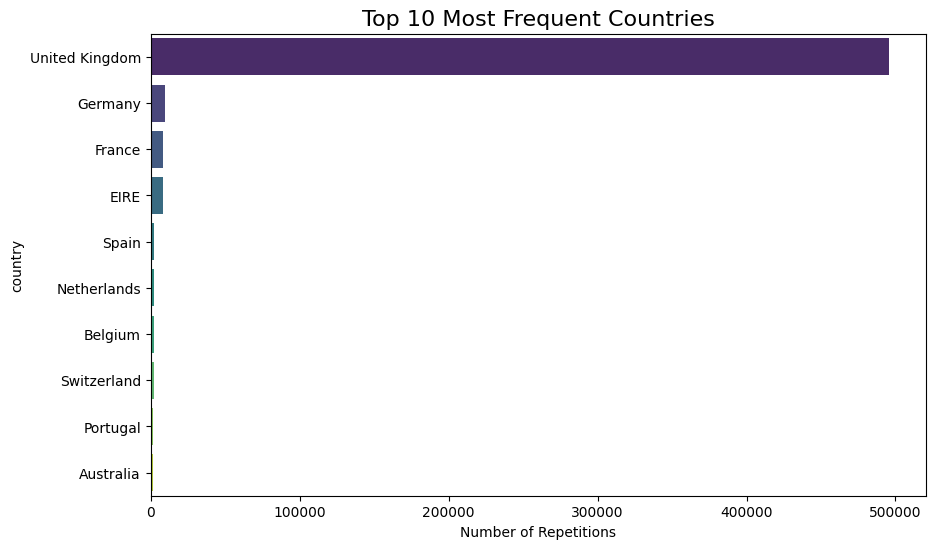

In [12]:
country_count = df.Country.value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=country_count.values, y=country_count.index, palette="viridis")
plt.title("Top 10 Most Frequent Countries", fontsize=16)
plt.xlabel("Number of Repetitions")
plt.ylabel("country")
plt.show()

/var/folders/f7/2r0sxd_50nzgv2x2bmzq74n00000gn/T/ipykernel_3873/1476623145.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_triend.values, y=time_triend.index, palette='viridis')


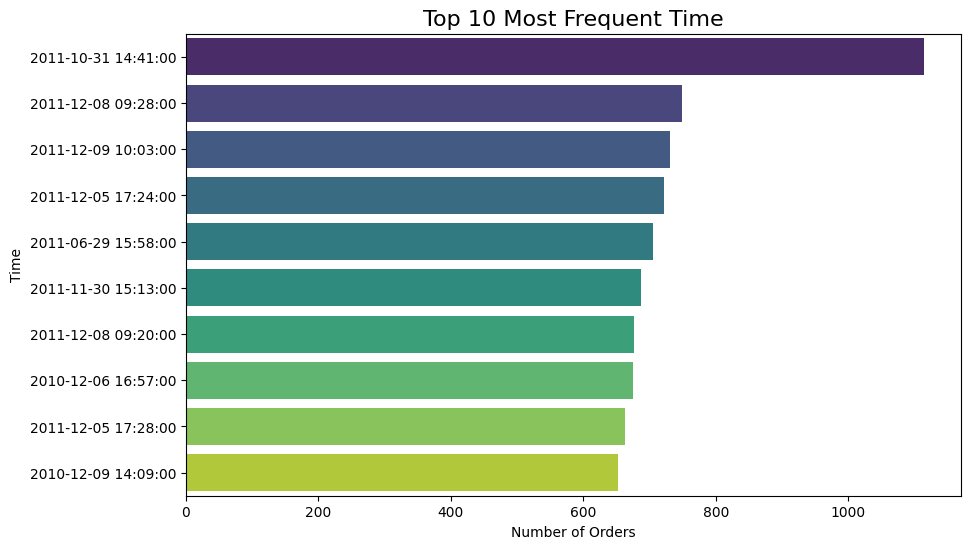

In [13]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
time_triend = df["InvoiceDate"].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=time_triend.values, y=time_triend.index, palette="viridis")
plt.title("Top 10 Most Frequent Time", fontsize=16)
plt.xlabel("Number of Orders")
plt.ylabel("Time")
plt.show()

/var/folders/f7/2r0sxd_50nzgv2x2bmzq74n00000gn/T/ipykernel_3873/3460415319.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=description_count.values, y=description_count.index, palette='viridis')


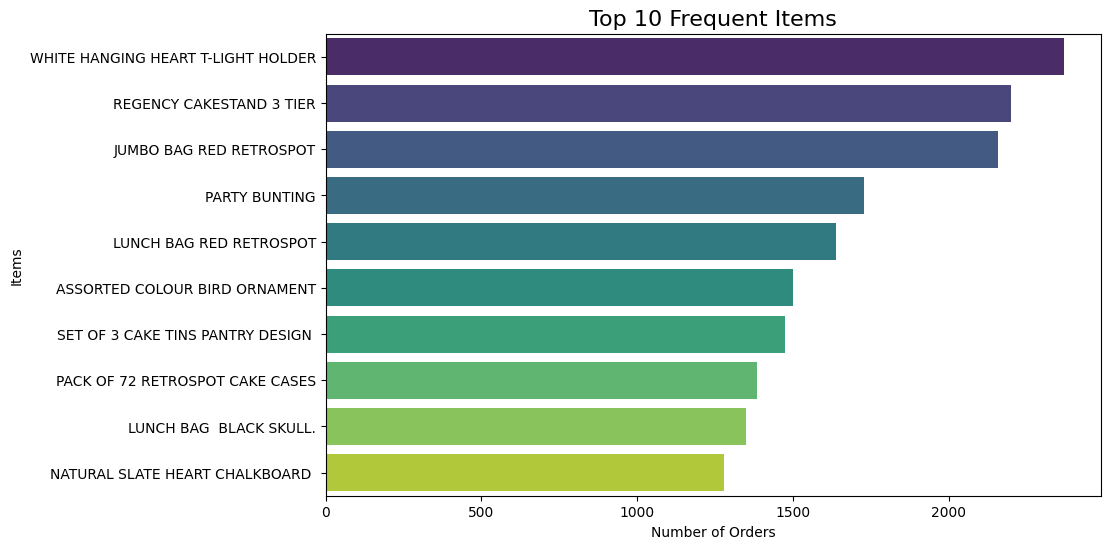

In [14]:
description_count = df["Description"].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=description_count.values, y=description_count.index, palette="viridis")
plt.title("Top 10 Frequent Items", fontsize=16)
plt.xlabel("Number of Orders")
plt.ylabel("Items")
plt.show()

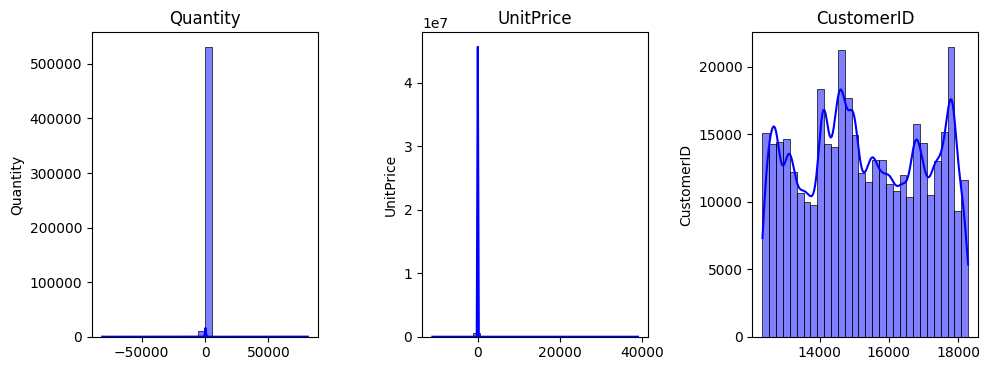

In [15]:
plt.figure(figsize=(10, 4))
for i, feature in enumerate(df.select_dtypes(include="number").columns):
    plt.subplot(1, 3, i + 1)
    sns.histplot(data=df, x=df[feature], bins=30, kde=True, color="blue")
    plt.title(f"{feature}")
    plt.xlabel(" ")
    plt.ylabel(feature)
plt.tight_layout()

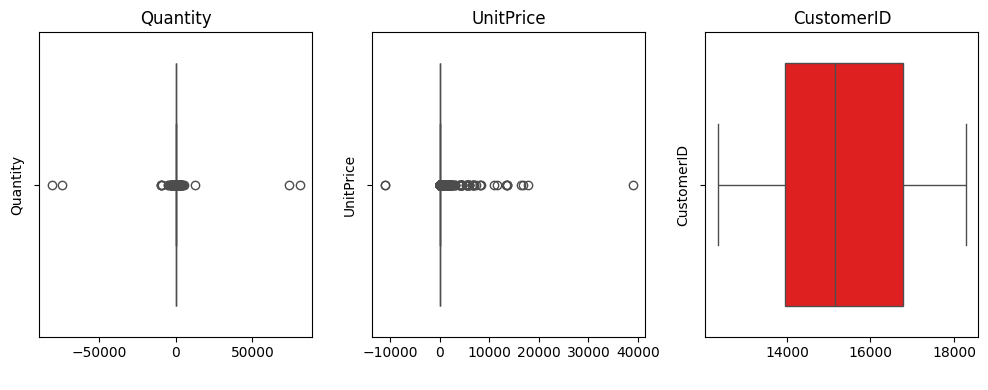

In [16]:
plt.figure(figsize=(10, 4))
for i, feature in enumerate(df.select_dtypes(include="number").columns):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df, x=df[feature], color="red")
    plt.title(f"{feature}")
    plt.xlabel(" ")
    plt.ylabel(f"{feature}")
plt.tight_layout()

# Garbage Treatment

In [17]:
df.drop_duplicates(inplace=True)

# Outliers Treatment

In [18]:
q1 = df["Quantity"].quantile(0.30)
q3 = df["Quantity"].quantile(0.70)
iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df = df.loc[(df["Quantity"] < upper_limit) & (df["Quantity"] > lower_limit)]

In [19]:
q1 = df["UnitPrice"].quantile(0.25)
q3 = df["UnitPrice"].quantile(0.65)
iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df = df.loc[(df["UnitPrice"] < upper_limit) & (df["UnitPrice"] > lower_limit)]

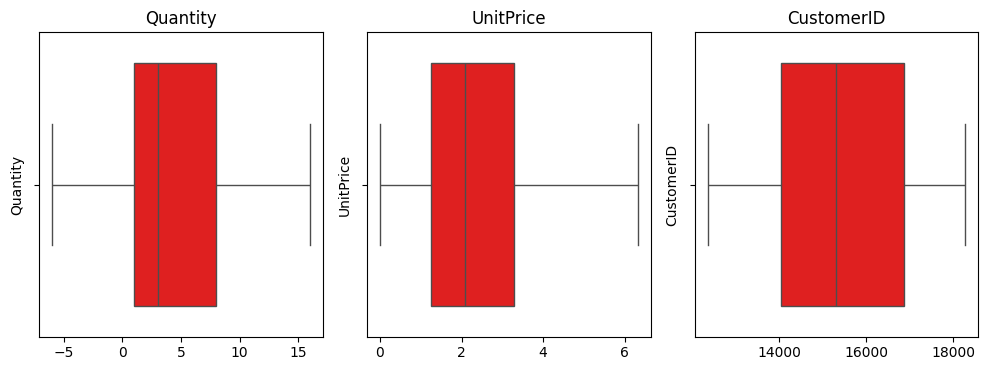

In [20]:
plt.figure(figsize=(10, 4))
for i, feature in enumerate(df.select_dtypes(include="number").columns):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df, x=df[feature], color="red")
    plt.title(f"{feature}")
    plt.xlabel(" ")
    plt.ylabel(f"{feature}")
plt.tight_layout()

In [21]:
df.to_csv("data/cleaned_retail.csv", index=False)

# Encoding

In [22]:
X = df[["Quantity", "UnitPrice", "Country"]]

In [23]:
encoder = LabelEncoder()

X.loc[:, "Country"] = encoder.fit_transform(X["Country"])

# Missing Values Treatment

In [24]:
X.dropna(inplace=True)

/var/folders/f7/2r0sxd_50nzgv2x2bmzq74n00000gn/T/ipykernel_3873/490656300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


In [25]:
X.isnull().sum()

Quantity     0
UnitPrice    0
Country      0
dtype: int64

# Feature Engineering

In [26]:
X["total_price"] = X["Quantity"] * X["UnitPrice"]

/var/folders/f7/2r0sxd_50nzgv2x2bmzq74n00000gn/T/ipykernel_3873/2361811339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["total_price"] = X["Quantity"] * X["UnitPrice"]


In [27]:
X

,Quantity,UnitPrice,Country,total_price
0,6,2.55,36,15.30
1,6,3.39,36,20.34
2,8,2.75,36,22.00
3,6,3.39,36,20.34
4,6,3.39,36,20.34
...,...,...,...,...
541904,12,0.85,13,10.20
541905,6,2.10,13,12.60
541906,4,4.15,13,16.60
541907,4,4.15,13,16.60


# Correlation Matrix

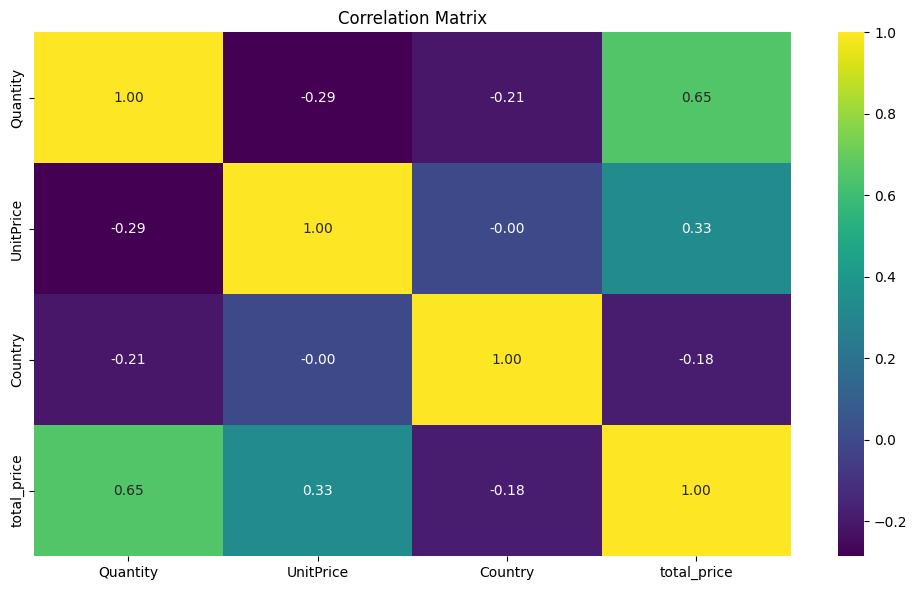

In [28]:
corr = X.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="viridis")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# Scaling

In [29]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

# Clustering

In [30]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/Users/josericardo/Developer/Repos/UFG/HPC-Dunn-Index/.conda/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/josericardo/Developer/Repos/UFG/HPC-Dunn-Index/.conda/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/josericardo/Developer/Repos/UFG/HPC-Dunn-Index/.conda/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/josericardo/Developer/Repos/UFG/HPC-Dunn-Index/.conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/josericardo/Developer/Repos/UFG/HPC-Dunn-Index/.conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users

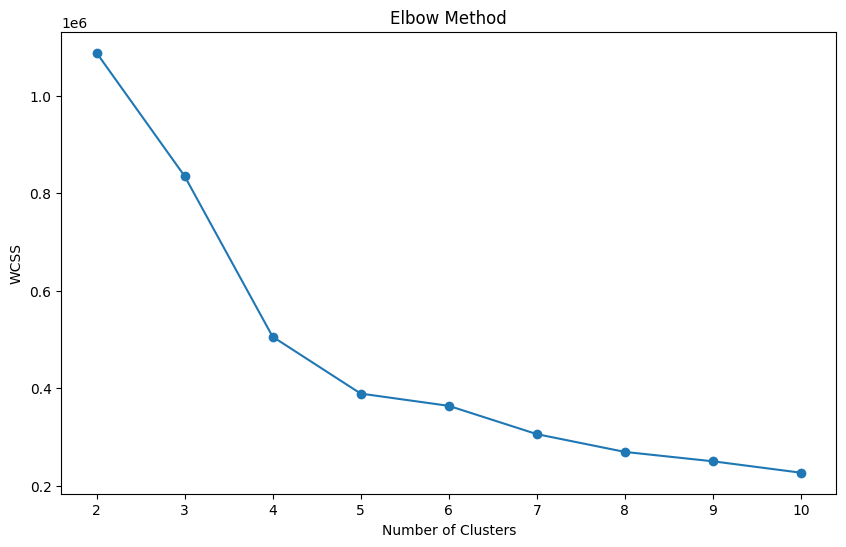

In [31]:
# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [32]:
kmeans = KMeans(n_clusters=5, random_state=42)
df["Cluster"] = kmeans.fit_predict(X)

/Users/josericardo/Developer/Repos/UFG/HPC-Dunn-Index/.conda/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/josericardo/Developer/Repos/UFG/HPC-Dunn-Index/.conda/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/josericardo/Developer/Repos/UFG/HPC-Dunn-Index/.conda/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/josericardo/Developer/Repos/UFG/HPC-Dunn-Index/.conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/josericardo/Developer/Repos/UFG/HPC-Dunn-Index/.conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users

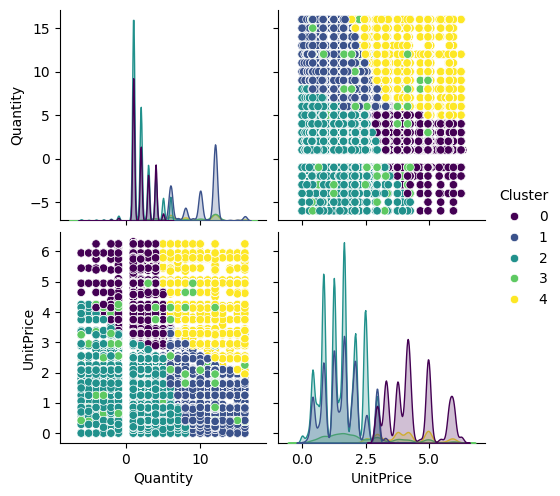

In [ ]:
sns.pairplot(
    df,
    hue="Cluster",
    vars=[
        "Quantity",
        "UnitPrice",
    ],
    palette="viridis",
)
plt.show()